# Lab Assignment 5: Recurrent Neural Networks
### Author: [Your Name]
### Date: [Submission Date]

## 1. Time Series Dataset Creation and RNN Training

### 1.1 Dataset Preparation
- **Dataset**: Apple stock prices (AAPL) were downloaded using the `yfinance` library.
- **Focus**: Closing prices for time series forecasting.

In [1]:
!pip install yfinance

import yfinance as yf
import pandas as pd

# Download stock price data for Apple (AAPL)
data = yf.download('AAPL', period='5y')

# Extract 'Close' prices for time series
series = data['Close'].values.reshape(-1, 1)
data.to_csv('aapl_prices.csv', index=True)  # Save for reference

[*********************100%***********************]  1 of 1 completed


### 1.2 RNN Model Training
- **Task**: Train a simple RNN for one-step-ahead forecasting.
- **Libraries Used**: TensorFlow/Keras for model building.

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Scale the dataset
scaler = MinMaxScaler()
series_scaled = scaler.fit_transform(series)

# Prepare data for RNN
def create_sequences(data, timesteps):
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:i + timesteps])
        y.append(data[i + timesteps])
    return np.array(X), np.array(y)

timesteps = 60
X, y = create_sequences(series_scaled, timesteps)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define RNN model
rnn_model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(timesteps, 1)),
    Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse')

# Train the model
history = rnn_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0104 - val_loss: 0.0018
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013 - val_loss: 8.5773e-04
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.2360e-04 - val_loss: 6.9033e-04
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.8910e-04 - val_loss: 5.8232e-04
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.0612e-04 - val_loss: 5.2766e-04
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.0623e-04 - val_loss: 6.5040e-04
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.1422e-04 - val_loss: 4.5780e-04
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.7173e-04 - val_loss: 5.8543e-04
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.2934e-04 - val_loss: 4.5663e-04
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.8859e-04 - val_loss: 4.6015e-04
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.9340e-04 - 

## 2. Batch and Layer Normalization

In [3]:
from tensorflow.keras.layers import BatchNormalization, LayerNormalization

# RNN with Batch Normalization
bn_model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(timesteps, 1)),
    BatchNormalization(),
    SimpleRNN(50, return_sequences=False),
    Dense(1)
])
bn_model.compile(optimizer='adam', loss='mse')

# Train the model
history_bn = bn_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.2671 - val_loss: 0.0322
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0109 - val_loss: 0.0629
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0083 - val_loss: 0.0600
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0106 - val_loss: 0.0396
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0060 - val_loss: 0.0617
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0041 - val_loss: 0.0607
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0036 - val_loss: 0.0641
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0066 - val_loss: 0.0489
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0061 - val_loss: 0.0260
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0028 - val_loss: 0.0372
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0019 - val_loss: 0.0534
Epoch 12/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

## 3. LSTM and GRU Model Training

In [4]:
from tensorflow.keras.layers import LSTM, GRU

# Define LSTM Model
lstm_model = Sequential([
    LSTM(50, activation='tanh', input_shape=(timesteps, 1)),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

# Train LSTM
history_lstm = lstm_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=32)

# Define GRU Model
gru_model = Sequential([
    GRU(50, activation='tanh', input_shape=(timesteps, 1)),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse')

# Train GRU
history_gru = gru_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1316 - val_loss: 0.0067
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - val_loss: 0.0019
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0010 - val_loss: 7.8614e-04
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.7643e-04 - val_loss: 7.2115e-04
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.3565e-04 - val_loss: 7.0284e-04
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.0911e-04 - val_loss: 6.9673e-04
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.0728e-04 - val_loss: 7.4143e-04
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.0985e-04 - val_loss: 6.9019e-04
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.0958e-04 - val_loss: 7.0753e-04
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.8798e-04 - val_loss: 6.9720e-04
Ep

## 4. Results and Error Indicators

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
MSE for RNN: 0.00022991008814572322
MSE for LSTM: 0.00025289046078464164
MSE for GRU: 0.0001772663557300097


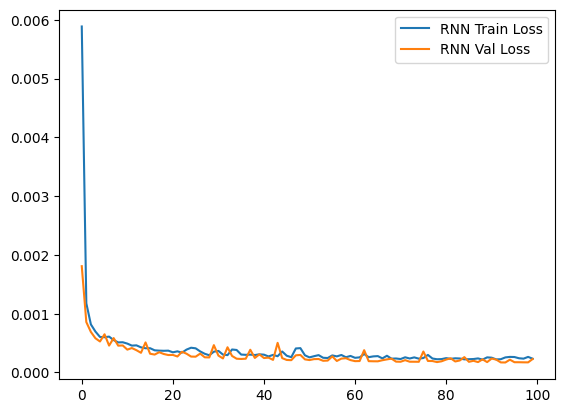

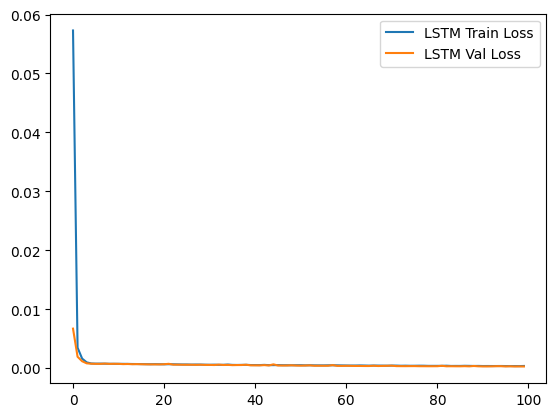

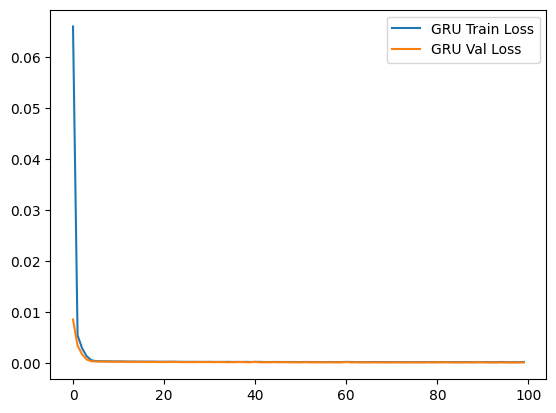

In [5]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Calculate errors
rnn_predictions = rnn_model.predict(X_val)
lstm_predictions = lstm_model.predict(X_val)
gru_predictions = gru_model.predict(X_val)

mse_rnn = mean_squared_error(y_val, rnn_predictions)
mse_lstm = mean_squared_error(y_val, lstm_predictions)
mse_gru = mean_squared_error(y_val, gru_predictions)

print(f"MSE for RNN: {mse_rnn}")
print(f"MSE for LSTM: {mse_lstm}")
print(f"MSE for GRU: {mse_gru}")

# Plot loss curves
plt.plot(history.history['loss'], label='RNN Train Loss')
plt.plot(history.history['val_loss'], label='RNN Val Loss')
plt.legend()
plt.show()

plt.plot(history_lstm.history['loss'], label='LSTM Train Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Val Loss')
plt.legend()
plt.show()

plt.plot(history_gru.history['loss'], label='GRU Train Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Val Loss')
plt.legend()
plt.show()

## 5. Bach Chorales Dataset

In [ ]:
%%bash
git clone https://github.com/ageron/handson-ml2.git
cd handson-ml2/datasets/jsb_chorales
tar xvf jsb_chorales.tgz

In [33]:
import numpy as np
import os
from sklearn.model_selection import train_test_split

# Step 1: Load and preprocess the Bach Chorales dataset
def load_chorales(directory):
    """
    Load chorales from the specified directory. Handles string notes like 'note0'.
    Maps each unique note to a unique integer.
    """
    chorales = []
    note_to_int = {}  # Mapping from note to integer
    current_int = 0

    for file in os.listdir(directory):
        filepath = os.path.join(directory, file)
        with open(filepath, "r") as f:
            chorale = []
            for line in f:
                notes = line.strip().split(",")
                for note in notes:
                    if note not in note_to_int:
                        note_to_int[note] = current_int
                        current_int += 1
                    chorale.append(note_to_int[note])
            chorales.append(chorale)
    return chorales, note_to_int

# Load the dataset
directory = "./handson-ml2/datasets/jsb_chorales/train"
chorales, note_to_int = load_chorales(directory)

# Step 2: Prepare the data
# Flatten chorales and pad sequences to the same length
max_timesteps = max(len(chorale) for chorale in chorales)
padded_chorales = [
    np.pad(chorale, (0, max_timesteps - len(chorale)), constant_values=-1)
    for chorale in chorales
]

# Create input (X) and target (y) sequences
X = np.array([chorale[:-1] for chorale in padded_chorales])  # Input sequences
y = np.array([chorale[1:] for chorale in padded_chorales])   # Target sequences

# Replace padding (-1) with 0 for compatibility with the model
X[X == -1] = 0
y[y == -1] = 0

# One-hot encode the target sequences
vocab_size = len(note_to_int)
y = to_categorical(y, num_classes=vocab_size)



# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input to match the expected shape of the Conv1D layer
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)


In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, TimeDistributed

vocab_size = len(note_to_int)
seq_length = 16

model = Sequential([
    Input(shape=(X_train.shape[1], 1)),  # Input layer
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    LSTM(128, return_sequences=True),
    Dense(vocab_size, activation='softmax')  # Output layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_14 (Conv1D)                   │ (None, 2067, 64)            │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 2067, 128)           │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 2067, 51)            │           6,579 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,651 (412.70 KB)

 Trainable params: 105,651 (412.70 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:


# Train the model
history = model.fit(
    X_train, y_train,
    epochs=600,
    validation_data=(X_val, y_val)
    )


Epoch 1/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.5412 - loss: 3.8550 - val_accuracy: 0.6038 - val_loss: 3.6391
Epoch 2/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.5792 - loss: 3.5664 - val_accuracy: 0.6137 - val_loss: 2.9733
Epoch 3/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.5892 - loss: 2.3981 - val_accuracy: 0.6318 - val_loss: 1.4421
Epoch 4/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6147 - loss: 1.5014 - val_accuracy: 0.6436 - val_loss: 1.3719
Epoch 5/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6234 - loss: 1.4429 - val_accuracy: 0.6509 - val_loss: 1.3210
Epoch 6/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.6223 - loss: 1.4188 - val_accuracy: 0.6579 - val_loss: 1.2708
Epoch 7/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.6328 - loss: 1.3593 - val_accuracy: 0.6702 - val_loss: 1.2265
Epoch 8/600
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.6467 - loss: 1.3014 - val_accuracy: 0.6747 - val_loss

In [90]:
import numpy as np

def generate_music(model, seed_sequence, num_steps, int_to_note, note_to_int):
    """
    Generate a sequence of MIDI notes from a trained model.
    Ensures that notes are within the MIDI range (21–108).
    """
    generated = list(seed_sequence.flatten()) # Flatten seed_sequence
    current_sequence = seed_sequence.reshape(1, seed_sequence.shape[0], 1) # Reshape for the model
    for _ in range(num_steps):
        # Predict the next note
        prediction = model.predict(current_sequence, verbose=0)
        next_note = np.argmax(prediction[0, -1, :])
        # Ensure note is within MIDI range
        next_note = max(21, min(next_note, 108))
        # Append to the sequence
        generated.append(next_note)
        # Update the current sequence
        current_sequence = np.concatenate([current_sequence[:, 1:, :], [[[next_note]]]], axis=1)  #Maintain the 3D shape
    return generated


seed_sequence = X_val[0]  # Starting sequence from validation set
generated_music = generate_music(model, seed_sequence, num_steps=100, int_to_note=int_to_note, note_to_int=note_to_int)

# Create the inverse mapping from integer to note
int_to_note = {i: note for note, i in note_to_int.items()}

# Convert the generated sequence back to notes
generated_notes = [int_to_note[i] for i in generated_music]



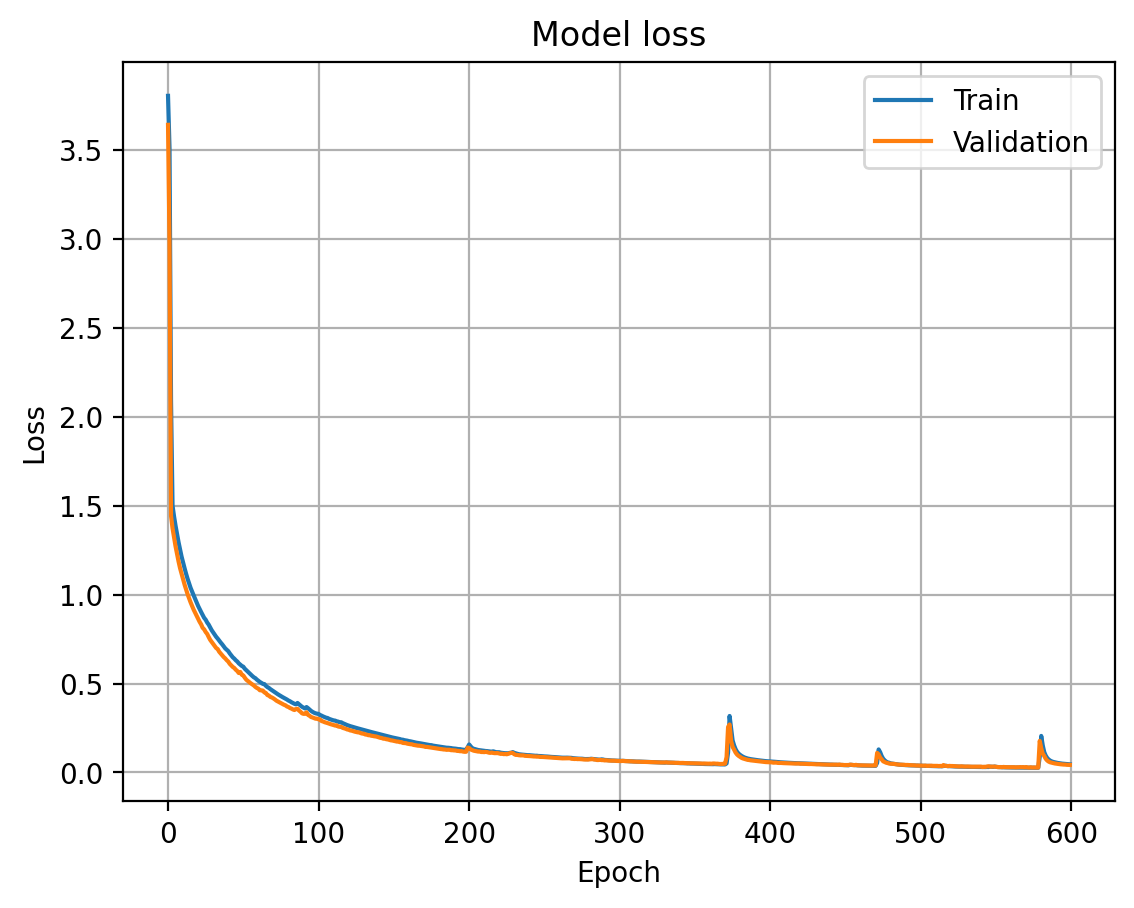

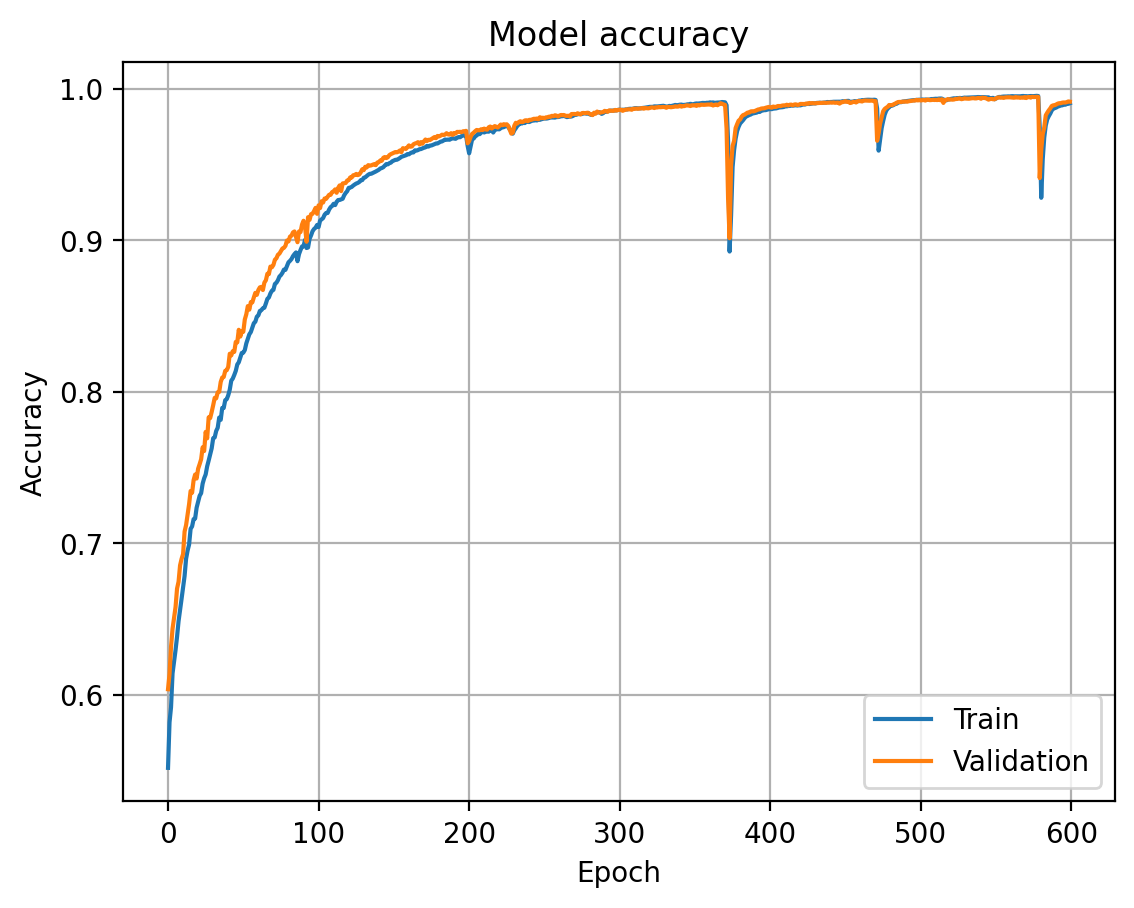

In [65]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid(True)
plt.show()

In [92]:
generated_notes

['note0',
 'note1',
 'note2',
 'note3',
 '62',
 '57',
 '53',
 '50',
 '62',
 '57',
 '53',
 '50',
 '62',
 '57',
 '53',
 '50',
 '62',
 '57',
 '53',
 '50',
 '69',
 '64',
 '57',
 '49',
 '69',
 '64',
 '57',
 '49',
 '69',
 '64',
 '57',
 '49',
 '69',
 '64',
 '57',
 '49',
 '69',
 '65',
 '62',
 '50',
 '69',
 '65',
 '62',
 '50',
 '69',
 '65',
 '62',
 '50',
 '69',
 '65',
 '62',
 '50',
 '67',
 '64',
 '59',
 '52',
 '67',
 '64',
 '59',
 '52',
 '67',
 '64',
 '59',
 '52',
 '67',
 '64',
 '59',
 '52',
 '74',
 '62',
 '57',
 '54',
 '74',
 '62',
 '57',
 '54',
 '74',
 '64',
 '59',
 '56',
 '74',
 '64',
 '59',
 '56',
 '72',
 '64',
 '60',
 '57',
 '72',
 '64',
 '60',
 '57',
 '72',
 '66',
 '62',
 '57',
 '72',
 '66',
 '62',
 '57',
 '71',
 '68',
 '64',
 '52',
 '71',
 '68',
 '64',
 '52',
 '71',
 '68',
 '62',
 '52',
 '71',
 '68',
 '62',
 '52',
 '69',
 '64',
 '60',
 '45',
 '69',
 '64',
 '60',
 '45',
 '69',
 '64',
 '60',
 '45',
 '69',
 '64',
 '60',
 '45',
 '72',
 '67',
 '60',
 '52',
 '72',
 '67',
 '60',
 '52',
 '72',
 